## Agenda

- Demo of k-NN classifier, a non-parametric method
- Classifier evaluation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# Load Data
dataset = np.genfromtxt('data/09-pima-indians-diabetes.data.csv', delimiter=',')
print(dataset.shape)

# separate the data from the target attributes
X = dataset[:,0:7]
y = dataset[:,8]

(768, 9)


In [4]:
# Look at the number of examples in each class
np.unique(y, return_counts=True)

(array([0., 1.]), array([500, 268], dtype=int64))

In [5]:
# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [6]:
# import necessary modules for classifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
#help(KNeighborsClassifier)

In [8]:
# instantiate the classifier
kNN = KNeighborsClassifier(n_neighbors=3)

In [9]:
# fit the classifer
kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Training a dummy classifier
from sklearn.dummy import DummyClassifier

In [11]:
dummy = DummyClassifier(strategy='uniform')
dummy.fit(X_train, y_train)

DummyClassifier(strategy='uniform')

In [12]:
# Evaluating the trained classifier

# import modules that help us with evaluation
from sklearn import metrics

In [13]:
# for kNN classifier
y_pred = kNN.predict(X_test)
y_pred_proba = kNN.predict_proba(X_test)[:,1] # selecting the probability p(y=1|x)

In [14]:
# for dummy classifier
y_pred_dummy = dummy.predict(X_test)
y_pred_proba_dummy = dummy.predict_proba(X_test)[:,1] # selecting the probability p(y=1|x)

In [15]:
# Accuracy score
print('Accuracy of the learned kNN classifier: {}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Accuracy of the learned dummy classifier: {}'.format(metrics.accuracy_score(y_test, y_pred_dummy)))

Accuracy of the learned kNN classifier: 0.7316017316017316
Accuracy of the learned dummy classifier: 0.44155844155844154


In [16]:
# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba) # for kNN
fpr_d, tpr_d, _ = metrics.roc_curve(y_test, y_pred_proba_dummy) # for dummy

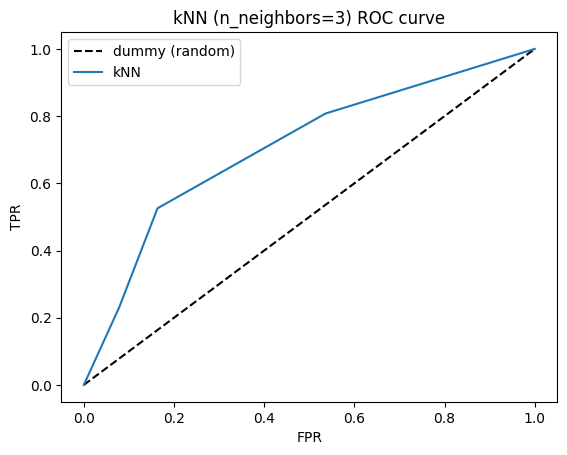

In [17]:
# plotting the curve
plt.plot(fpr_d,tpr_d, 'k--', label='dummy (random)')
plt.plot(fpr,tpr, label='kNN')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('kNN (n_neighbors=3) ROC curve')
plt.legend()
plt.show()

In [18]:
# AUC-ROC
auROC = metrics.roc_auc_score(y_test,y_pred_proba) # for kNN
auROC_d = metrics.roc_auc_score(y_test,y_pred_proba_dummy) # for dummy
print('AUC-ROC of the learned kNN classifier: {}'.format(auROC))
print('AUC-ROC of the learned dummy classifier: {}'.format(auROC_d))

AUC-ROC of the learned kNN classifier: 0.7089827383945031
AUC-ROC of the learned dummy classifier: 0.5


In [19]:
# PR curve
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred_proba)

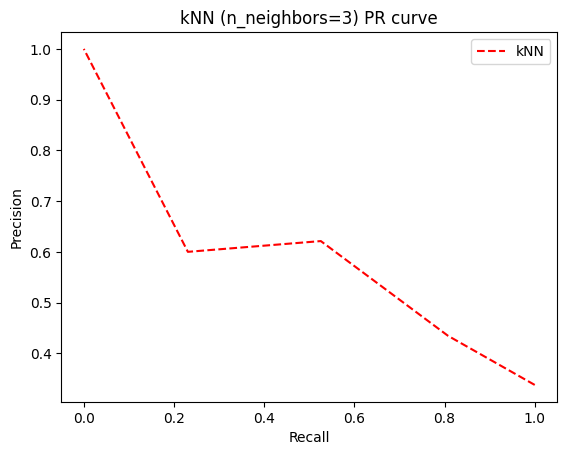

In [20]:
# plotting the curve
plt.plot(recall, precision, 'r--', label='kNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('kNN (n_neighbors=3) PR curve')
plt.legend()
plt.show()

In [21]:
# AUC-PR
auPR = metrics.average_precision_score(y_test,y_pred_proba) # for kNN
print('AUC-PR of the learned kNN classifier: {}'.format(auPR))

AUC-PR of the learned kNN classifier: 0.5091209556726799
